In [1]:
import torch
print(torch.__version__)

1.4.0+cpu


In [2]:
#Tensor 神经网络界的Numpy
"""
1)torch.function   torch.sum,torch.add

2)tensor.function   tensor.view.tensor.add

"""

x=torch.tensor([1,2])
y=torch.tensor([3,4])
z=x.add(y)
print(z)
print(x)
x.add_(y)  #x.add(y) 不改变x的值，x.add_(y)改变x的值
print(x)

tensor([4, 6])
tensor([1, 2])
tensor([4, 6])


In [3]:
#创建Tensor
"""
Tensor(*size)  直接从参数构造一个的张量，支持List,Numpy数组
eye(row,column) 指定行列创建
linspace(start,end,steps) 从start到end,均匀分成steps份
logspace(start,end,steps) 从10^start……
rand/randn(*size) 生成[0,1)均匀分布/标准正太分布数据
ones(*size)返回指定shape的张量，元素初始为1
zeros(*size) ……
ones_like(t)
zeros_like(t)
arange(start,end,step) 在区间上以间隔step生成一个序列张量
from_Numpy(ndarray) 从ndarray创建一个Tensor

"""
t=torch.Tensor([[1,2,3],[1,2,3]])
print(t.size())
print(t.shape)

torch.Size([2, 3])
torch.Size([2, 3])


In [4]:
"""
 torch.Tensor是 torch.empty和torch.tensor之间的一种混合，
 但是当传入数据时，torch.Tensor使用全局默认dtype(FloatTensor),
 而.tensor是从数据中推断数据类型
 
 torch.tensor(1)返回固定值1，而torch.Tensor(1)返回一个大小为1的张量，随机初始化值
"""
t1=torch.Tensor(1)
t2=torch.tensor(1)
print(f"t1的值{t1},t1的类型{t1.type()}")
print(f"t2的值{t2},t2的类型{t2.type()}")

t1的值tensor([0.]),t1的类型torch.FloatTensor
t2的值1,t2的类型torch.LongTensor


In [5]:
"""
numel(input)计算Tensor的元素个数
view(*shape)修改Tensor的shape,与Reshape类似，返回对象与源共用内存，修改一个另一个也变
Reshape就是生成新的  view(-1)展平数组
resize 类似于view,但在size超出时会重新分配内存
item若Tensor为单元素，则返回Python的标量
unsqueeze 在指定维度增加一个"1" dim=2  A*B-->A*B*1
squeeze 在指定维度压缩一个"1" A*B*1 dim=2 A*B 如果不指定，将删除所有维数为1的维度
"""
x=torch.randn(2,3)
print(x.size())
print(x.dim())  #维度
print(x.view(3,2))
y=x.view(-1)
print(y.shape)
z=torch.unsqueeze(y,0)
print(z.size())
print(z.numel())

torch.Size([2, 3])
2
tensor([[ 1.2767,  0.7837],
        [ 0.9792,  1.1593],
        [ 0.3983, -0.7705]])
torch.Size([6])
torch.Size([1, 6])
6


In [6]:
"""
reshape()可以由torch.reshape(),也可由torch.Tensor.reshape()调用
但view()只可由torch.Tensor.view()来调用

view的Tensor新size必须与原来的size与stride兼容
否则在View前需要调用contiguous()方法

同样也是返回与input数据量相同，但形状不同的Tensor。若满足view的条件，
则不会有copy,若不满足，则会copy。

如果只是想重塑张量，使用reshape。如果想共享内存，view

"""
#Torch中的dot和numpy中不一样，Torch中分1D2D3D

'\nreshape()可以由torch.reshape(),也可由torch.Tensor.reshape()调用\n但view()只可由torch.Tensor.view()来调用\n\nview的Tensor新size必须与原来的size与stride兼容\n否则在View前需要调用contiguous()方法\n\n同样也是返回与input数据量相同，但形状不同的Tensor。若满足view的条件，\n则不会有copy,若不满足，则会copy。\n\n如果只是想重塑张量，使用reshape。如果想共享内存，view\n\n'

In [7]:
"""
求导
1.创建叶子节点的Tensor,使用requires_gard参数指定是否记录对其的操作，
以便以后利用backward()方法进行梯度求解，参数的缺省值为False,如果要对其
求需设置成True,然后与之有依赖关系的节点会自动变为True。
2.可利用requires_grad_()方法修改Tensor的requires_gard属性，
可以调用.detach()或withtorch.no_grad():将不再计算张量的梯度，
跟踪张量的历史记录。这点在评估模型、测试中常常用到。
3.通过运算创建的Tensor(非叶子节点)，会自动被赋予grad_fn属性。
该属性表示梯度函数。叶子节点的grad_fn为None
4.最后得到的Tensor执行backward函数，此时自动计算各变量的梯度，
并将结果保存到grad属性中。计算完成后，非叶子节点的梯度自动释放。
5.backward()函数接收参数，该参数应和调用backward()函数的Tensor维度相同，
或者是可broadcast的维度。
6.反向传播的中间缓存会被清空，如果需要进行多次反向传播，需要指定backward中
的参数retain_graph=True,多次反向传播时，梯度是累加的。
7.非叶子节点的梯度backward调用后即被清空
8.可以通过torch.no_gard()包裹代码块的形式阻止autograd去跟踪那些requires_gard标记为True的
张量的历史记录

整个过程，采用计算图的形式，动态图，每次向前传播将重新构建。


计算图为有向无环图DAG
表示算子与变量之间的关系
圆形表示变量，矩形表示算子

叶子节点是用户创建的变量，计算得到的变量是非叶子节点、根节点。
由变量和算子就构成一个完整的计算过程-->向前传播的过程
PyTorch调用backward()方法，将自动计算各节点的梯度，这是一个反向传播过程，就是链式求导
求所有叶子节点的梯度，将梯度值累加到grad属性中，非叶子记录在grad_fn中，叶子的grad_fn=None
"""

'\n求导\n1.创建叶子节点的Tensor,使用requires_gard参数指定是否记录对其的操作，\n以便以后利用backward()方法进行梯度求解，参数的缺省值为False,如果要对其\n求需设置成True,然后与之有依赖关系的节点会自动变为True。\n2.可利用requires_grad_()方法修改Tensor的requires_gard属性，\n可以调用.detach()或withtorch.no_grad():将不再计算张量的梯度，\n跟踪张量的历史记录。这点在评估模型、测试中常常用到。\n3.通过运算创建的Tensor(非叶子节点)，会自动被赋予grad_fn属性。\n该属性表示梯度函数。叶子节点的grad_fn为None\n4.最后得到的Tensor执行backward函数，此时自动计算各变量的梯度，\n并将结果保存到grad属性中。计算完成后，非叶子节点的梯度自动释放。\n5.backward()函数接收参数，该参数应和调用backward()函数的Tensor维度相同，\n或者是可broadcast的维度。\n6.反向传播的中间缓存会被清空，如果需要进行多次反向传播，需要指定backward中\n的参数retain_graph=True,多次反向传播时，梯度是累加的。\n7.非叶子节点的梯度backward调用后即被清空\n8.可以通过torch.no_gard()包裹代码块的形式阻止autograd去跟踪那些requires_gard标记为True的\n张量的历史记录\n\n整个过程，采用计算图的形式，动态图，每次向前传播将重新构建。\n\n\n计算图为有向无环图DAG\n表示算子与变量之间的关系\n圆形表示变量，矩形表示算子\n\n叶子节点是用户创建的变量，计算得到的变量是非叶子节点、根节点。\n由变量和算子就构成一个完整的计算过程-->向前传播的过程\nPyTorch调用backward()方法，将自动计算各节点的梯度，这是一个反向传播过程，就是链式求导\n求所有叶子节点的梯度，将梯度值累加到grad属性中，非叶子记录在grad_fn中，叶子的grad_fn=None\n'

In [8]:
"""目标张量为标量"""
x=torch.Tensor([2])#输入张量
#初始化权重参数w，偏移量b，并设置require_grad属性为True,为自动求导
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
#实现向前传播
y=torch.mul(w,x)
z=torch.add(y,b)
#基于z张量进行梯度反向传播，执行backward之后计算图会自动清空
z.backward()
#如果需要多次使用backward,需要修改参数retain_graph为True,此时梯度是累加的z.backward(retain_graph=True)
#查看叶子节点的梯度
print("参数w,b,x的梯度分别为：{}，{},{}".format(w.grad,b.grad,x.grad))
#非叶子节点的梯度，执行backward之后，会自动清空

参数w,b,x的梯度分别为：tensor([2.])，tensor([1.]),None


In [9]:
"""非标量反向传播"""
#在Pytorch中，不让张量对张量求导，只允许标量对张量求导
"""
一般目标张量是一个标量，比如Loss
如果目标张量是非标量调用backward(),需要传入一个gradient参数
该参数也是张量，而且需要调用backward()的张量形状相同
传入这个参数就是为了把张量对张量的求导转换为标量对张量的求导
假设目标loss=(y1,y2,......)
传入参数v=(v1,v2,.......)
可以把对loss的求导，转换为对loss*vT标量求导
即把原来aloss/ax得到的雅可比矩阵乘以张量vT,便可得到需要的梯度矩阵

就是高数里那个多元函数的求导，利用雅可比行列式
"""
.backward(gardient=None,retain_garph=None,create_graph=False)

SyntaxError: invalid syntax (<ipython-input-9-9f7ba9c4c663>, line 15)

In [10]:
import torch
#叶子节点张量x,形状1*2
x=torch.tensor([[2,3]],dtype=torch.float,requires_grad=True)
#初始化雅可比矩阵Jacobian
J=torch.zeros(2,2)
#初始化目标向量
y=torch.zeros(1,2)
y[0,0]=x[0,0]**2+3*x[0,1]
y[0,1]=x[0,1]**2+2*x[0,0]
#生成y1对x的梯度
y.backward(torch.Tensor([[1,0]]),retain_graph=True)
J[0]=x.grad
#梯度是累加的，故需要对x的梯度清零
x.grad=torch.zeros_like(x.grad)
y.backward(torch.Tensor([[0,1]]))
J[1]=x.grad
print(J)

tensor([[4., 3.],
        [2., 6.]])


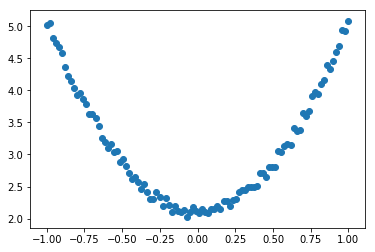

In [11]:
"""使用Tensor和Antograd实现机器学习"""
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
#生成训练数据
t.manual_seed(100)
dtype=t.float
x=t.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=3*x.pow(2)+2+0.2*torch.rand(x.size())

plt.scatter(x.numpy(),y.numpy())
plt.show()

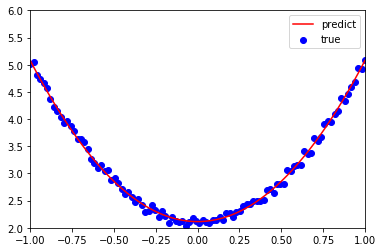

tensor([[2.9655]], requires_grad=True) tensor([[2.1143]], requires_grad=True)


In [22]:
#随机初始化参数，参数w\b为需要学习的，故需requires_grad=True
#w=t.randn(1,1,dtype=dtype)
#w.requires_grad=True
w=t.randn(1,1,dtype=dtype,requires_grad=True)
b=t.zeros(1,1,dtype=dtype,requires_grad=True)

#训练模型
lr=0.001#学习率
for ii in range(800):
    #向前传播，并定义损失函数loss
    y_pred=x.pow(2).mm(w)+b
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    #自动计算梯度，梯度存放在grad属性里
    loss.backward()
    #手动更新参数，需要用torch.no_grad(),使上下文环境中切断自动求导的计算
    with t.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
    #梯度清零
        w.grad.zero_()
        b.grad.zero_()
        
#可视化训练结果
plt.plot(x.numpy(),y_pred.detach().numpy(),'r-',label='predict')
#这个detach()创建一个新的tensor但是不具有梯度
plt.scatter(x.numpy(),y.numpy(),color='blue',marker='o',label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()#标签
plt.show()
print(w,b)

In [ ]:
#神经网络核心组件
"""
层 将输入张量转换为输出张量
模型 层构成的网络
损失函数 参数学习的目标函数，通过最小化损失函数来学习各种参数
优化器 如何使损失最小

"""
#构建网络模型

import numpy as np
import torch

from torchvision.datasets import mnist
#导入预处理模块
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
#导入nn及优化器
import torch.nn.functional as F
import torch.optim as optim
from torch import nn

#定义一些超参数
train_batch_size=64
test_batch_size=128
learning_rate=0.01
num_epoches=20
lr=0.01
momentum=0.5

#定义预处理函数，这些预处理依次放在Compose函数中
transform = transform.Compose([transforms.ToTensor(),transform.Normalize([0.5],[0.5])])
#transform.Compose可以把一些转换函数组合在一起
#Normalize([0.5],[0,5])对张量进行归一化   全局平均值和方差

#构建网络  继承Module类
class Net(nn.Module):
    """
     nn.Module 是所有神经网络单元（neural network modules）的基类
    
    使用sequential构建网络，Sequential()函数的功能是将网络的层组合到一起
    
    以下为各层神经元个数：
输入： in_dim
第一层： n_hidden_1
第二层：n_hidden_2
第三层（输出层）：out_dim
    """
    def __init__(self,in_dim,n_hidden_1,n_hidden_2,out_dim):
        super(Net,self).__init__()  #使用父类初始化方法，转换成Net的父类的对象
        self.layer1=nn.Sequential(nn,Liner(in_dim,n_hidden_1),nn.BatchNorm1d(n_hidden_1))
        # BatchNorm就是在深度神经网络训练过程中使得每一层神经网络的输入保持相同分布的
        self.layer2=nn.Sequential(nn.Liner(n_hidden_1,n_hidden_2),nn.BatchNormld(n_hidden_1))
        self.layer3=nn.Sequential(nn.Liner(n_hidden_2,out_dim))
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=self.layer3(x)
        return x
    
#检测是否有可用的GPU，有就用，没就CPU
device=torch.device("cuda:0"if torch.cuda.is_available() else "cpu")
#实例化网络
model=Net(28*28,300,100,10)
model.to(device)

#定义损失函数和优化器

